# Diagnóstico de cáncer de mama
### Métodos de clasificación supervisada

### Descripción:
El cáncer de mama es el cáncer más común entre las mujeres en el mundo. Representa el 25 % de todos los casos de cáncer y afectó a más de 2,1 millones de personas solo en 2015. Comienza cuando las células en el seno comienzan a crecer sin control. Estas células generalmente forman tumores que se pueden ver a través de rayos X o sentir como bultos en el área del seno.

Los desafíos clave contra su detección es cómo clasificar los tumores en malignos (cancerosos) o benignos (no cancerosos). Le pedimos que complete el análisis de clasificación de estos tumores mediante el aprendizaje automático (con SVM) y el conjunto de datos (diagnóstico) de Wisconsin de cáncer de mama.

### Agradecimientos:
Este conjunto de datos ha sido referido desde Kaggle.
https://www.kaggle.com/yasserh/breast-cancer-diagnosis-best-ml-algorithms/data

### Objetivo:
Comprender el conjunto de datos y la limpieza (si es necesario).
Crear modelos de clasificación para predecir si el tipo de cáncer es maligno o benigno.
Ajustar los hiperparámetros 
Comparar las métricas de evaluación de varios algoritmos de clasificación.

Vamos a comenzar importando algunas librerías básicas para nuestro análisis:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Es momento de cargar la base de datos y hacer una breve inspección para verificar que todo esté en orden:

In [2]:
df = pd.read_csv("breast-cancer.csv")
df = df.drop("id", axis = 1)

Eliminamos el <b>id</b> ya que es un dato que no es relevante para este estudio.

In [3]:
print(df.head())
print(df.shape)

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

Verificamos los tipos de datos

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Revisamos que no hay datos faltantes

In [5]:
print(df.isnull().any())

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave_points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave_points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_worst             False
fractal_di

In [6]:
df.nunique().sort_values()

diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave_points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave_points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
concavity_mean             537
compactness_mean           537
concavity_worst            539
area_mean                  539
radius_se                  540
compactness_se             541
concave_points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
dtype: int64

## Análisis Exploratorio de Datos (EDA)

Una vez confirmado que la base de datos está lista para ser utilizada, comencemos con el análisis exploratorio de los datos (EDA).

In [57]:
#X = df.drop("diagnosis", axis = 1)
X = df[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
print('El dataset consiste de {} variables y {} elementos.'.format(X.shape[1], X.shape[0]))
print(X.describe().T.round(2))

El dataset consiste de 10 variables y 569 elementos.
                         count    mean     std     min     25%     50%  \
radius_worst             569.0   16.27    4.83    7.93   13.01   14.97   
texture_worst            569.0   25.68    6.15   12.02   21.08   25.41   
perimeter_worst          569.0  107.26   33.60   50.41   84.11   97.66   
area_worst               569.0  880.58  569.36  185.20  515.30  686.50   
smoothness_worst         569.0    0.13    0.02    0.07    0.12    0.13   
compactness_worst        569.0    0.25    0.16    0.03    0.15    0.21   
concavity_worst          569.0    0.27    0.21    0.00    0.11    0.23   
concave_points_worst     569.0    0.11    0.07    0.00    0.06    0.10   
symmetry_worst           569.0    0.29    0.06    0.16    0.25    0.28   
fractal_dimension_worst  569.0    0.08    0.02    0.06    0.07    0.08   

                             75%      max  
radius_worst               18.79    36.04  
texture_worst              29.72    49.54  


Podemos observar que tenemos variables muy parecidas

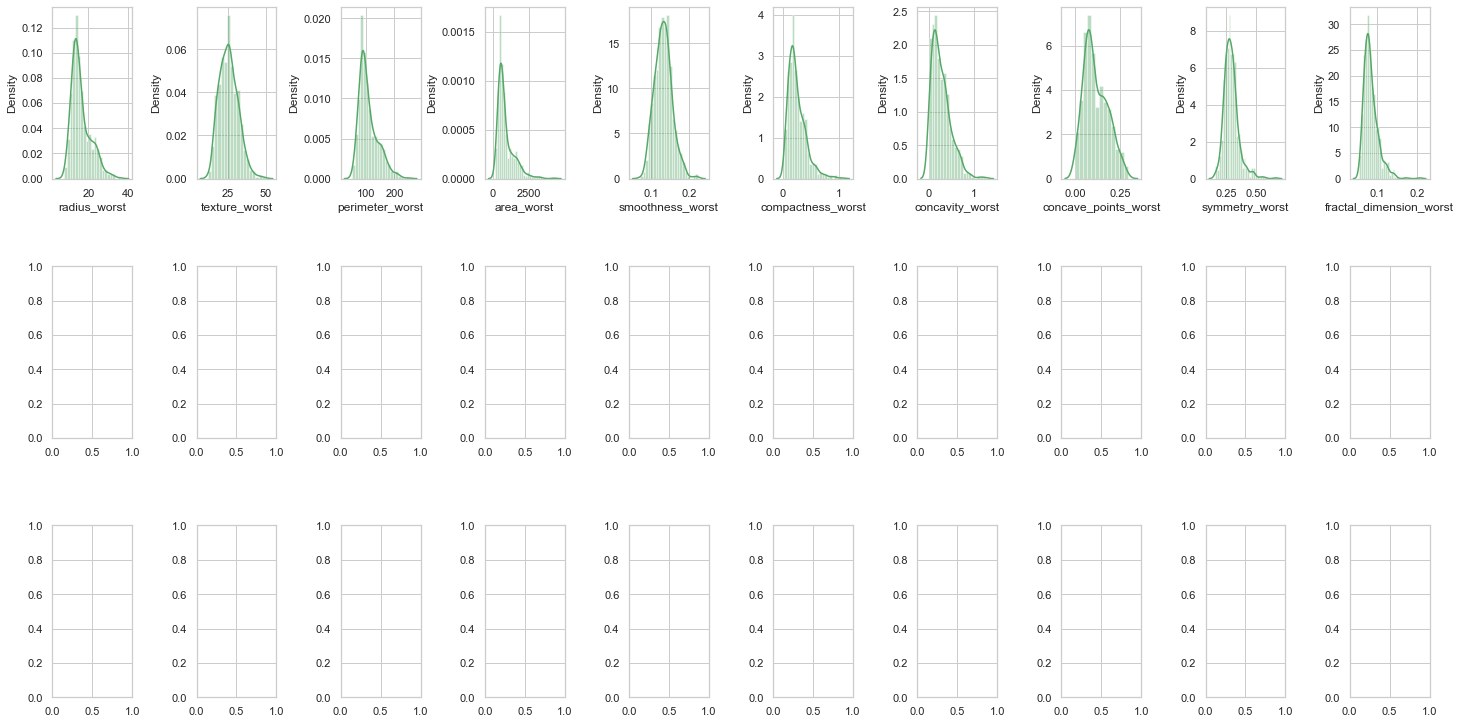

In [58]:
fig, ax = plt.subplots(ncols=10, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in X.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Vemos distribuciones sesgadas para la derecha.

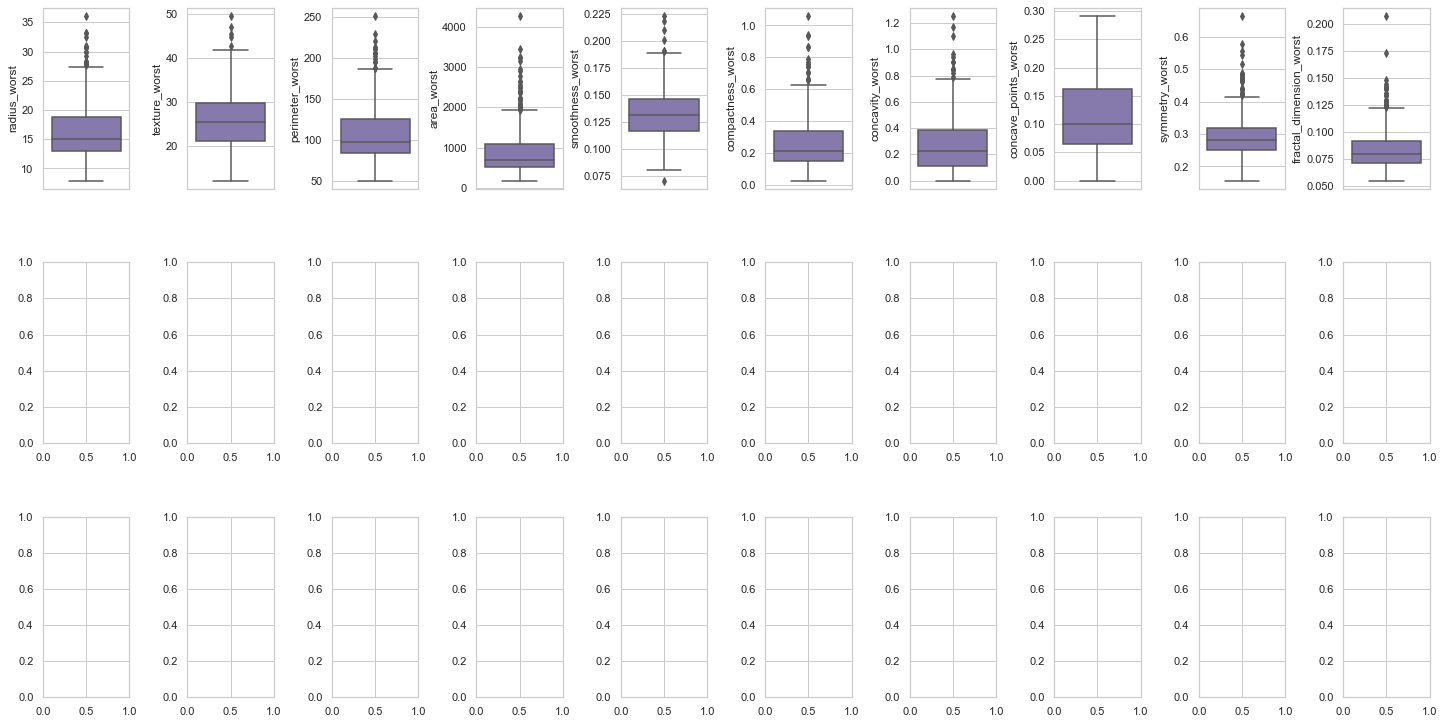

In [59]:
fig, ax = plt.subplots(ncols=10, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in X.items():
    sns.boxplot(y=col, data=X, color='m', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Se observan algunos outliers

(569,)
  y_variable  percentage_count
1          M          0.372583
0          B          0.627417


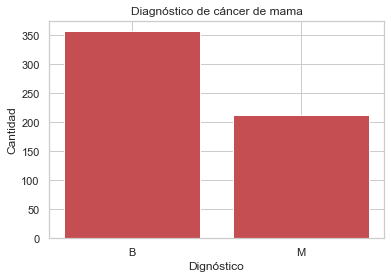

In [60]:
y = df["diagnosis"]
print(y.shape)
print(y.value_counts(normalize = True).reset_index().rename(columns = {'index': 'y_variable', 'diagnosis': 'percentage_count'}).sort_values(by = "percentage_count"))

labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center', color = "r")
plt.title("Diagnóstico de cáncer de mama")
plt.xlabel("Dignóstico")
plt.ylabel("Cantidad")
plt.xticks(labels)
plt.show()

Usaremos <b>diagnosis</b> como variable objetivo

In [61]:
y_binary = np.where(y >= 'M', 1, 0) # problema de clasificación binario.

Convertimos <b>B a 0</b> y <b>M a 1</b>

In [62]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

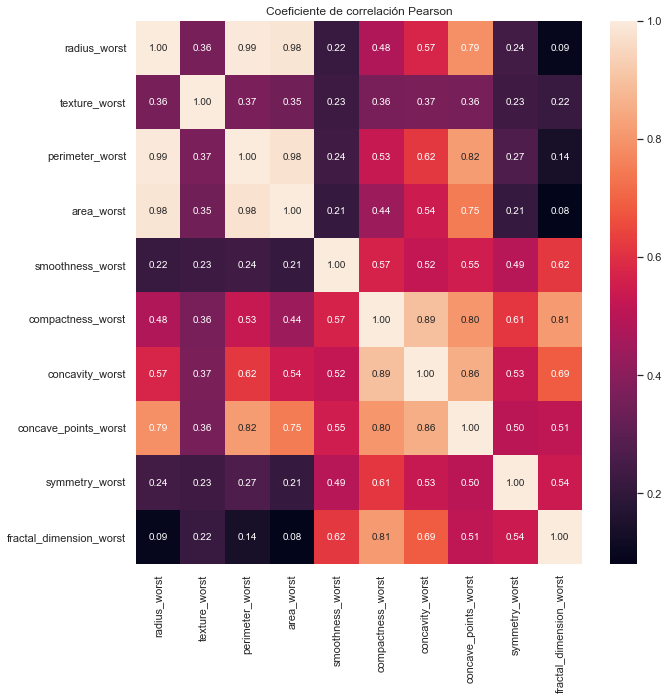

In [63]:
corr_spearman = df[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_spearman, annot = True, fmt=".2f").set_title(
    "Coeficiente de correlación Pearson")
plt.show()

Tenemos algunas variables que son altamente correlacionadas, por lo tanto podemos precindir de ellas.

## Métodos de clasificacion

Ahora sí estamos listos para aplicar nuestros algoritmos. Por ahora los aplicaremos con los hiperparámetros definidos por default, esto con el objetivo de comparar nuestros modelos.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

Vamos a aplicar la estandarización a nuestras variables explicativas

In [65]:
ss = PowerTransformer()
X_scaled = ss.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled)
print(df_scaled.describe().T.round(2))

   count  mean  std   min   25%   50%   75%   max
0  569.0  -0.0  1.0 -3.09 -0.63 -0.07  0.74  2.43
1  569.0  -0.0  1.0 -2.85 -0.72  0.05  0.72  3.03
2  569.0   0.0  1.0 -3.07 -0.65 -0.08  0.75  2.48
3  569.0   0.0  0.0  0.00  0.00  0.00  0.00  0.00
4  569.0  -0.0  1.0 -3.19 -0.67  0.02  0.65  3.22
5  569.0  -0.0  1.0 -2.32 -0.69 -0.07  0.80  2.49
6  569.0   0.0  1.0 -1.82 -0.77 -0.01  0.75  2.51
7  569.0  -0.0  1.0 -2.13 -0.73 -0.11  0.79  2.16
8  569.0  -0.0  1.0 -3.31 -0.63  0.01  0.62  3.25
9  569.0  -0.0  1.0 -2.56 -0.72 -0.04  0.70  2.68


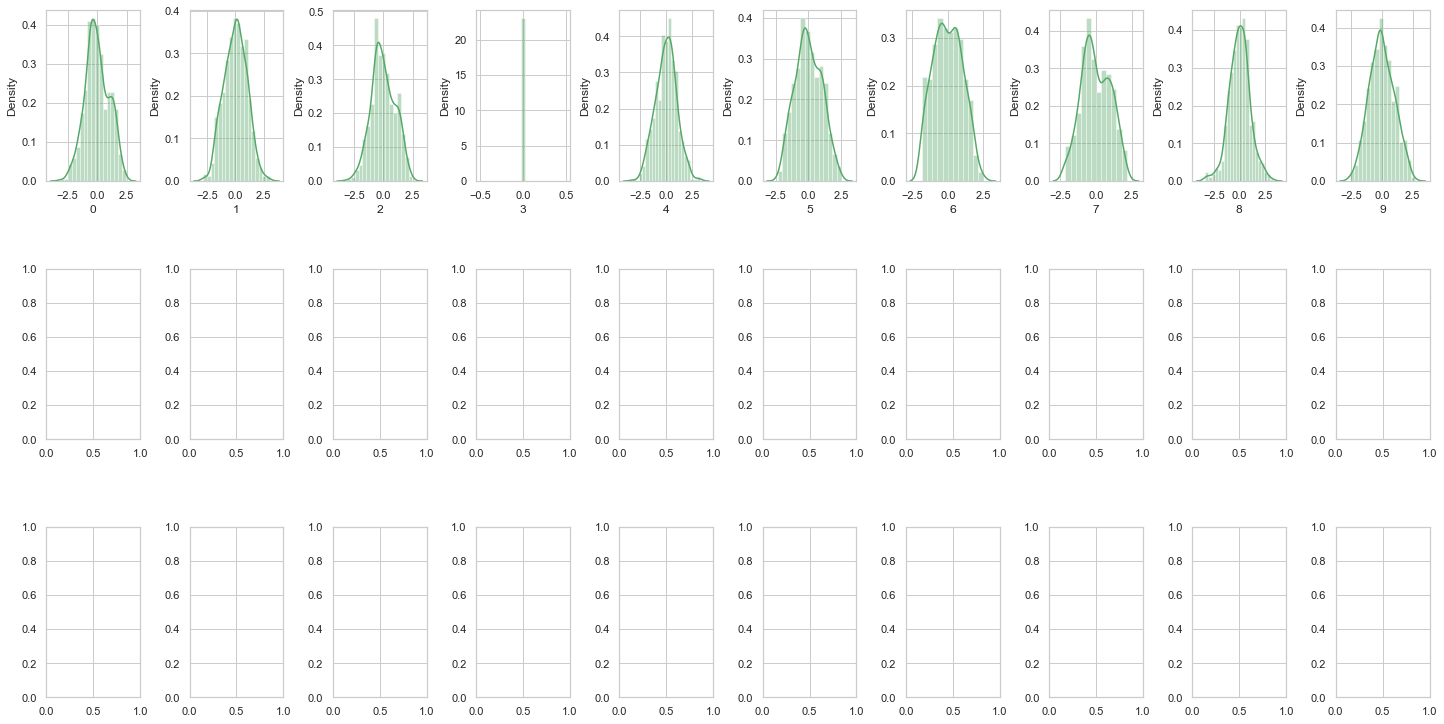

In [66]:
fig, ax = plt.subplots(ncols=10, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_scaled.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Ahora sí, hagamos la separación de nuestra base de datos

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size = 0.25, random_state = 22)

print("X_train shape: "+str(X_train.shape[0]), "y_train shape: "+str(y_train.shape[0]), sep = "\n")
print("X_test shape:"+str(X_test.shape[0]), "y_test shape:"+str(y_test.shape[0]), sep = "\n")

X_train shape: 426
y_train shape: 426
X_test shape:143
y_test shape:143


¡Perfecto! Ya tenemos todo lo que necesitamos para comenzar nuestra lucha de clasificadores.

Ahora es tu trabajo entrenar cada uno de los modelos mencionados, evaluarlos con la base de prueba y comparar cuál es el mejor ... por ahora

In [68]:
evaluacion = pd.DataFrame(np.zeros((6,3)), columns=['Entrenamiento','Prueba','Tiempo'])
evaluacion.index=['Clasificador ingenuo de Bayes (NB)','Clúster por vecino más cercano (KNN)','Regresión Logística (LR)','Bosque aleatorio (RF)',
                         'Maquina de soporte vectorial (SVM)','Red Neuronal Artificial']
evaluacion

,Entrenamiento,Prueba,Tiempo
Clasificador ingenuo de Bayes (NB),0.0,0.0,0.0
Clúster por vecino más cercano (KNN),0.0,0.0,0.0
Regresión Logística (LR),0.0,0.0,0.0
Bosque aleatorio (RF),0.0,0.0,0.0
Maquina de soporte vectorial (SVM),0.0,0.0,0.0
Red Neuronal Artificial,0.0,0.0,0.0


## Ajuste de hiperparámetros

In [69]:
from sklearn.model_selection import RandomizedSearchCV

### Clasificador ingenuo de Bayes

Este clasificador no tiene hiperparámetros a definir, por lo que podemos entrenarlo y evaluarlo directamente

In [70]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train) #Entrena el modelo
y_pred_nb = NaiveBayes.predict(X_test) #Genera la predicción

In [71]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(NaiveBayes.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(NaiveBayes.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.94
Precisión del modelo en el subconjunto de prueba: 0.97


In [72]:
evaluacion.iloc[0]['Entrenamiento'] = format(NaiveBayes.score(X_train, y_train).round(2))
evaluacion.iloc[0]['Prueba'] = format(NaiveBayes.score(X_test, y_test).round(2))

### Clúster por vecino más cercano (KNN)

In [73]:
# Hiperparámetros
n_neighbors = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

param_grid = {"n_neighbors": n_neighbors, "weights": weights, "metric": metric}

# Instancia del modelo
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [74]:
# Ajusta de hiperparámetros y entrenamiento
KNN_cv = RandomizedSearchCV(KNN, param_grid, cv = 5)
KNN_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [2, 4, 6, 8, 10, 12, 14,
                                                        16, 18, 20],
                                        'weights': ['uniform', 'distance']})

In [75]:
# Hiperparámetros que generan el mejor modelo
print("K vecinos más cercanos con hiperparámetros ajustados: {}".format(KNN_cv.best_params_))

K vecinos más cercanos con hiperparámetros ajustados: {'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan'}


In [76]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(KNN_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(KNN_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.97
Precisión del modelo en el subconjunto de prueba: 0.97


In [77]:
evaluacion.iloc[1]['Entrenamiento'] = format(KNN_cv.best_score_.round(2))
evaluacion.iloc[1]['Prueba'] = format(KNN_cv.score(X_test, y_test).round(2))
evaluacion.iloc[1]['Tiempo'] = KNN_cv.refit_time_

### Regresión Logística

In [78]:
# Hiperparámetros
c_space = np.logspace(-5, 20, 15)
penalty = ['none', 'l1', 'l2', 'elasticnet']

param_grid = {"C": c_space, "penalty": penalty}

# Instancia del modelo
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()

In [79]:
# Ajusta de hiperparámetros y entrenamiento
LogisticRegression_cv = RandomizedSearchCV(LogisticRegression, param_grid, cv = 5)
LogisticRegression_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-05, 6.10540230e-04, 3.72759372e-02, 2.27584593e+00,
       1.38949549e+02, 8.48342898e+03, 5.17947468e+05, 3.16227766e+07,
       1.93069773e+09, 1.17876863e+11, 7.19685673e+12, 4.39397056e+14,
       2.68269580e+16, 1.63789371e+18, 1.00000000e+20]),
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet']})

In [80]:
# Hiperparámetros que generan el mejor modelo
print("Regresión Logística con hiperparámetros ajustados: {}".format(LogisticRegression_cv.best_params_))

Regresión Logística con hiperparámetros ajustados: {'penalty': 'none', 'C': 7196856730011.528}


In [81]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(LogisticRegression_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(LogisticRegression_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.98
Precisión del modelo en el subconjunto de prueba: 0.94


In [82]:
evaluacion.iloc[2]['Entrenamiento'] = format(LogisticRegression_cv.best_score_.round(2))
evaluacion.iloc[2]['Prueba'] = format(LogisticRegression_cv.score(X_test, y_test).round(2))
evaluacion.iloc[2]['Tiempo'] = KNN_cv.refit_time_

### Bosque aleatorio

In [83]:
# Hiperparámetros
n_estimators = [int(n) for n in np.linspace(100, 1000, 5)]
max_depth = [int(d) for d in np.linspace(10, 50, 2)]
max_features = ["sqrt", "log2"]
criterion = ["gini", "entropy"]

param_grid = {"n_estimators": n_estimators,
         "max_depth": max_depth,
        "max_features": max_features,
        "criterion": criterion}

# Instancia del modelo
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [84]:
# Ajusta de hiperparámetros y entrenamiento
RFC_cv = RandomizedSearchCV(RFC, param_grid, cv = 5)
RFC_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]})

In [85]:
# Hiperparámetros que generan el mejor modelo
print("Bosques aleatorios con hiperparámetros ajustados: {}".format(RFC_cv.best_params_))

Bosques aleatorios con hiperparámetros ajustados: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'entropy'}


In [86]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(RFC_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(RFC_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.97
Precisión del modelo en el subconjunto de prueba: 0.95


In [87]:
evaluacion.iloc[3]['Entrenamiento'] = format(RFC_cv.score(X_train, y_train).round(2))
evaluacion.iloc[3]['Prueba'] = format(RFC_cv.score(X_test, y_test).round(2))
evaluacion.iloc[3]['Tiempo'] = RFC_cv.refit_time_

### Maquina de soporte vectorial

In [88]:
# Hiperparámetros
param_grid = {'C': np.logspace(-5, 10, 15), 'gamma':[0.01, 0.1, 1, 10]}

# Instancia del modelo
from sklearn.svm import SVC
SVC = SVC()

In [89]:
SVC_cv = RandomizedSearchCV(SVC, param_grid, cv = 5)
SVC_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([1.00000000e-05, 1.17876863e-04, 1.38949549e-03, 1.63789371e-02,
       1.93069773e-01, 2.27584593e+00, 2.68269580e+01, 3.16227766e+02,
       3.72759372e+03, 4.39397056e+04, 5.17947468e+05, 6.10540230e+06,
       7.19685673e+07, 8.48342898e+08, 1.00000000e+10]),
                                        'gamma': [0.01, 0.1, 1, 10]})

In [90]:
# Hiperparámetros que generan el mejor modelo
print("Maquina de soporte vectorial con hiperparámetros ajustados: {}".format(SVC_cv.best_params_))

Maquina de soporte vectorial con hiperparámetros ajustados: {'gamma': 0.01, 'C': 2.2758459260747865}


In [91]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(SVC_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(SVC_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.98
Precisión del modelo en el subconjunto de prueba: 0.97


In [92]:
evaluacion.iloc[4]['Entrenamiento'] = format(SVC_cv.best_score_.round(2))
evaluacion.iloc[4]['Prueba'] = format(SVC_cv.score(X_test, y_test).round(2))
evaluacion.iloc[4]['Tiempo'] = SVC_cv.refit_time_

### Red Neuronal Artificial

In [93]:
param_grid = { 'hidden_layer_sizes': [(10,30,10), (20,), (3,2,1)], 'activation': ['logistic', 'tanh', 'relu'], 'alpha': [0.001, 0.01, 0.1] }

from sklearn.neural_network import MLPClassifier
NN = MLPClassifier()

In [94]:
NN_cv = RandomizedSearchCV(NN, param_grid, cv = 5)
NN_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(),
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': [0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(10, 30, 10),
                                                               (20,),
                                                               (3, 2, 1)]})

In [95]:
# Hiperparámetros que generan el mejor modelo
print("Red Neuronal Artificial cercanos con hiperparámetros ajustados: {}".format(NN_cv.best_params_))

Red Neuronal Artificial cercanos con hiperparámetros ajustados: {'hidden_layer_sizes': (20,), 'alpha': 0.1, 'activation': 'relu'}


In [96]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(NN_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(NN_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.98
Precisión del modelo en el subconjunto de prueba: 0.97


In [97]:
evaluacion.iloc[5]['Entrenamiento'] = format(NN_cv.best_score_.round(2))
evaluacion.iloc[5]['Prueba'] = format(NN_cv.score(X_test, y_test).round(2))
evaluacion.iloc[5]['Tiempo'] = NN_cv.refit_time_

## Resultados

In [98]:
evaluacion

,Entrenamiento,Prueba,Tiempo
Clasificador ingenuo de Bayes (NB),0.94,0.97,0.000000
Clúster por vecino más cercano (KNN),0.97,0.97,0.000000
Regresión Logística (LR),0.98,0.94,0.000000
Bosque aleatorio (RF),1.00,0.95,0.131035
Maquina de soporte vectorial (SVM),0.98,0.97,0.001040
Red Neuronal Artificial,0.98,0.97,0.246342
